# Importação das bibliotecas básicas

In [1]:
!pip -q install plotly

In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regressão logística

## Base risco de crédito

In [7]:
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [8]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
# para esse estudo só será usado as clases alto e baixo, os outros registro serão apagados - moderado que são os registros # 2, 7, 11
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
# tamanho do array
tamanho = X_risco_credito.shape[0]
print("Tamanho do array X_risco_credito:", tamanho)

Tamanho do array X_risco_credito: 14


In [11]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0) # axis = 0 apagar linha (1= coluna)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [12]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [13]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [14]:
# criando um classificador de regressão logística com inicialização aleatória de parâmetros
logistic_risco_credito = LogisticRegression(random_state=1) # random_state=1 = sempre ter o mesmo resultado

# treinando o classificador com os dados de entrada X_risco_credito e os rótulos y_risco_credito
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [15]:
# retorna o coeficiente de interceptação (ou bias) aprendido pelo modelo de regressão logística logistic_risco_credito
logistic_risco_credito.intercept_

array([-0.80828993])

In [16]:
#retorna os coeficientes de inclinação (ou pesos) aprendidos pelo modelo de regressão logística logistic_risco_credito
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [17]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

0.9090909090909091

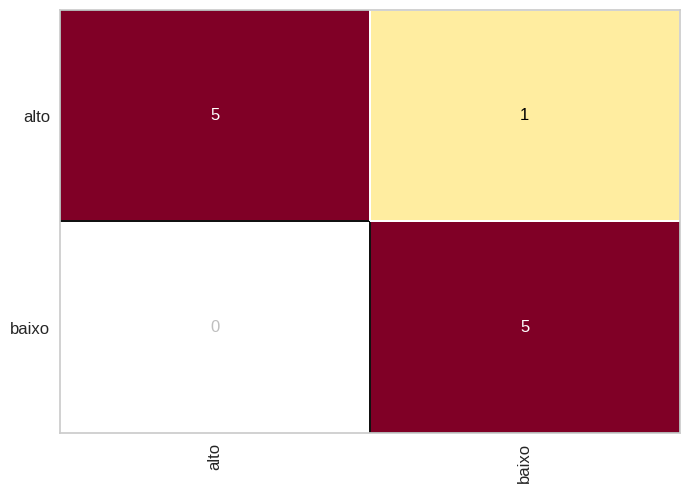

In [19]:
cm = ConfusionMatrix(logistic_risco_credito)
cm.fit(X_risco_credito, y_risco_credito)
cm.score(X_risco_credito, y_risco_credito)

## Base credit data - 94.60%

In [ ]:
import pickle
with open('/content/drive/MyDrive/ML e Data Sciece com python/dataset/credit_risc/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
# Criando um objeto do tipo LogisticRegression com inicialização aleatória de parâmetros
logistic_credit = LogisticRegression(random_state=1)

# Treinando o modelo LogisticRegression com os dados de treinamento X_credit_treinamento e os rótulos y_credit_treinamento
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
# retorna o coeficiente de interceptação (ou bias) aprendido pelo modelo de regressão logística
logistic_credit.intercept_

array([-6.02976095])

In [ ]:
# retorna os coeficientes de inclinação (ou pesos) aprendidos pelo modelo
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [ ]:
# Realizando previsões utilizando o modelo logistic_credit nos dados de teste X_credit_teste
previsoes = logistic_credit.predict(X_credit_teste)

# Retornando as previsões feitas pelo modelo
previsoes


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

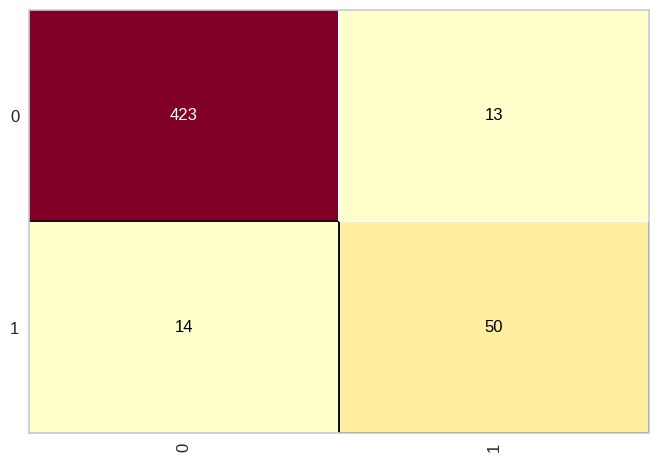

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



* Precision (Precisão): A proporção de exemplos classificados como positivos que são realmente positivos é de aproximadamente 97% para a classe 0 e 79% para a classe 1.
* Recall (Revocação): A proporção de exemplos positivos que foram corretamente identificados pelo modelo é de aproximadamente 97% para a classe 0 e 78% para a classe 1.
* F1-score: A média harmônica da precisão e do recall é de aproximadamente 97% para a classe 0 e 79% para a classe 1.
* Acurácia: A taxa de acertos global do modelo é de aproximadamente 95%.
* Macro avg: A média dos valores de precisão, recall e F1-score calculados para ambas as classes é de aproximadamente 88%.
* Weighted avg: A média dos valores de precisão, recall e F1-score, ponderada pelo suporte de cada classe, é de aproximadamente 95%.